# Milestone 1

`Dicky Librata Sembiring`\
`Hactive8 Student`\
`FTDS Batch 003` 

#### link data set
https://www.kaggle.com/datasets/anamsken/b2b-online-shopping-platform-dataset

#### link tableau
https://public.tableau.com/app/profile/dicky.librata/viz/Milestone1DickyLibrata/Dashboard1?publish=yes

## Identifikasi Masalah
### Objective
Mengetahui Revenue Growth dan Demografi Konsumen pada aspek Lokasi, Pembayaran, dan Kategori Produk serta Waktu Pengiriman pada tahun 2017 hingga 2018

### Problem Statement
1. Bagaimana trend revenue per kuartal maupun per bulan setiap tahun ?

2. Apakah tipe pembayan kartu credit memberi revenue paling besar ?

3. Bagimana jumlah transaksi pada masing - masing tipe pembayaran ?

4. Kota mana yang memiliki Total revenue tertinggi ?

5. Kota mana yang memiliki Total transaksi tertinggi?

6. Bagimana total revenue per hari setiap bulan ?

7. Berapa waktu pengiriman paling cepat, paling lambat dan rata rata ?

8. Bagaiman kecendrungan waktu pengiriman tiap daerah ?

9. Apakah harga, kota customer, dan kategori produk memperngaruhi waktu pengiriman ?

### Import Pustaka

In [45]:
# Import seluruh pustaka yang di perlukan

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

## Data Loading

In [16]:
# Mengganti parameter default missing value python dengan beberapa string yang kemungkinan menjadi missing value
miss_values = [" ", "-", "?" ,"n/a", "na", "--",'nan']
# loading data scv
df = pd.read_csv("B2B Online Shopping.csv",index_col=0, na_values=miss_values)

In [46]:
# Tampilkan 5 data teratas
df.head()

,order_id,customer_id,order_item_id,product_id,price,product_category,seller_id,order_status,delivery_status,customer_state,customer_city,payment_type,estimated_delivery_date,delivered_date,payment_value,purchase_type,order_time,order_year,order_day,order_month,order_hour,quarter,profit,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,Late,SP,sao paulo,credit_card,2017-10-18 00:00:00,2017-10-10 21:25:13,18.12,small_purchase,2017-10-02 10:56:33,2017,Monday,October,10,2017Q4,-11.87,8.436574
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,Late,SP,sao paulo,voucher,2017-10-18 00:00:00,2017-10-10 21:25:13,2.00,small_purchase,2017-10-02 10:56:33,2017,Monday,October,10,2017Q4,-27.99,8.436574
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,Late,SP,sao paulo,voucher,2017-10-18 00:00:00,2017-10-10 21:25:13,18.59,small_purchase,2017-10-02 10:56:33,2017,Monday,October,10,2017Q4,-11.40,8.436574
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumery,289cdb325fb7e7f891c38608bf9e0962,delivered,Late,BA,barreiras,boleto,2018-08-13 00:00:00,2018-08-07 15:27:45,141.46,small_purchase,2018-07-24 20:41:37,2018,Tuesday,July,20,2018Q3,22.76,13.782037
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1.0,aa4383b373c6aca5d8797843e5594415,159.90,auto,4869f7a5dfa277a7dca6462dcf3b52b2,delivered,Late,GO,vianopolis,credit_card,2018-09-04 00:00:00,2018-08-17 18:06:29,179.12,normal_purchase,2018-08-08 08:38:49,2018,Wednesday,August,8,2018Q3,19.22,9.394213


In [18]:
# Cek nama setiap kolom
df.columns

Index(['order_id', 'customer_id', 'order_item_id', 'product_id', 'price',
       'product_category_name_english', 'seller_id', 'order_status',
       'delivery_status', 'customer_state', 'customer_city', 'payment_type',
       'order_purchase_timestamp', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'payment_value', 'purchase_type',
       'order_date', 'order_year', 'order_day', 'order_month', 'order_hour'],
      dtype='object')

In [47]:
# Ubah nama agar mempermudah pengerjaan
df.rename(columns={'product_category_name_english' : 'product_category',
          'order_purchase_timestamp' : 'purchase_timestamp',
          'order_estimated_delivery_date' : 'estimated_delivery_date',
          'order_delivered_customer_date' : 'delivered_date',
          'order_date' : 'order_time'}, inplace=True)

In [48]:
# Cek basic info masing - masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114697 entries, 0 to 118433
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 114697 non-null  object        
 1   customer_id              114697 non-null  object        
 2   order_item_id            114697 non-null  float64       
 3   product_id               114697 non-null  object        
 4   price                    114697 non-null  float64       
 5   product_category         114697 non-null  object        
 6   seller_id                114697 non-null  object        
 7   order_status             114697 non-null  object        
 8   delivery_status          114697 non-null  object        
 9   customer_state           114697 non-null  object        
 10  customer_city            114697 non-null  object        
 11  payment_type             114697 non-null  object        
 12  estimated_delive

## Data Cleaning

### Handling missing value
Yang pertama di lakukan adalah membersihkan dataset

Pertama cek terlebih dahulu kolom yang memiliki missing value


In [24]:
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)

order_item_id  :  830
product_id  :  830
price  :  830
product_category  :  2553
seller_id  :  830
payment_type  :  3
delivered_date  :  3397
payment_value  :  3


In [25]:
# Drop row yang ada missing value dan merupakan informasi vital

df.drop(df[(df['order_item_id'].isnull()) &
   (df['price'].isnull()) &
   -(df['order_status'].isin(['unavailable','canceled']))
   ].index, inplace=True)

df.drop(df[(df['order_item_id'].isnull()) &
   (df['price'].isnull()) &
   (df['order_status'].isin(['unavailable','canceled']))
   ].index, inplace=True)

df.drop(df[(df['delivered_date'].isnull())].index, inplace=True)
df.drop(df[(df['payment_type'].isnull())].index, inplace=True)

# Isi kolom produk kategory dengan others
df['product_category'].fillna('Others', inplace=True)


### Drop Kolom

In [26]:
# Karena memiliki informasi yang sama maka drop kolom
df.drop(columns='purchase_timestamp', inplace=True)

Insight :
1. Kolom yang memiliki missing value pada data yang memiliki peranan vital harus di buang. 
2. Sedangkan kolom lain boleh di isi sesuai tipe kondisi datanya

## Analisis dan perhitungan

### Buat Kolom Baru

Buat kolom apa saja yang dibutuhkan untuk mengambil informasi dari kolom yang telah tersedia

In [27]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['delivered_date'] = pd.to_datetime(df['delivered_date'])

df['quarter'] = df['order_time'].dt.to_period('Q')
df['profit'] = df['payment_value'] - df['price']
df['delivery_time'] = df['delivered_date'] - df['order_time']
df['delivery_time'] = df['delivery_time'] / np.timedelta64(1,'D')

In [50]:
# pilih hanya tahun 2017 dan 2018
df = df[df['order_time'] >= '2017-01-01']
# Tampilkan kembali seluruh kolom yang telah siap digunakan
df.head()

,order_id,customer_id,order_item_id,product_id,price,product_category,seller_id,order_status,delivery_status,customer_state,customer_city,payment_type,estimated_delivery_date,delivered_date,payment_value,purchase_type,order_time,order_year,order_day,order_month,order_hour,quarter,profit,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,Late,SP,sao paulo,credit_card,2017-10-18 00:00:00,2017-10-10 21:25:13,18.12,small_purchase,2017-10-02 10:56:33,2017,Monday,October,10,2017Q4,-11.87,8.436574
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,Late,SP,sao paulo,voucher,2017-10-18 00:00:00,2017-10-10 21:25:13,2.00,small_purchase,2017-10-02 10:56:33,2017,Monday,October,10,2017Q4,-27.99,8.436574
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,housewares,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,Late,SP,sao paulo,voucher,2017-10-18 00:00:00,2017-10-10 21:25:13,18.59,small_purchase,2017-10-02 10:56:33,2017,Monday,October,10,2017Q4,-11.40,8.436574
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumery,289cdb325fb7e7f891c38608bf9e0962,delivered,Late,BA,barreiras,boleto,2018-08-13 00:00:00,2018-08-07 15:27:45,141.46,small_purchase,2018-07-24 20:41:37,2018,Tuesday,July,20,2018Q3,22.76,13.782037
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1.0,aa4383b373c6aca5d8797843e5594415,159.90,auto,4869f7a5dfa277a7dca6462dcf3b52b2,delivered,Late,GO,vianopolis,credit_card,2018-09-04 00:00:00,2018-08-17 18:06:29,179.12,normal_purchase,2018-08-08 08:38:49,2018,Wednesday,August,8,2018Q3,19.22,9.394213


### Pertumbuhan profit per kuartal

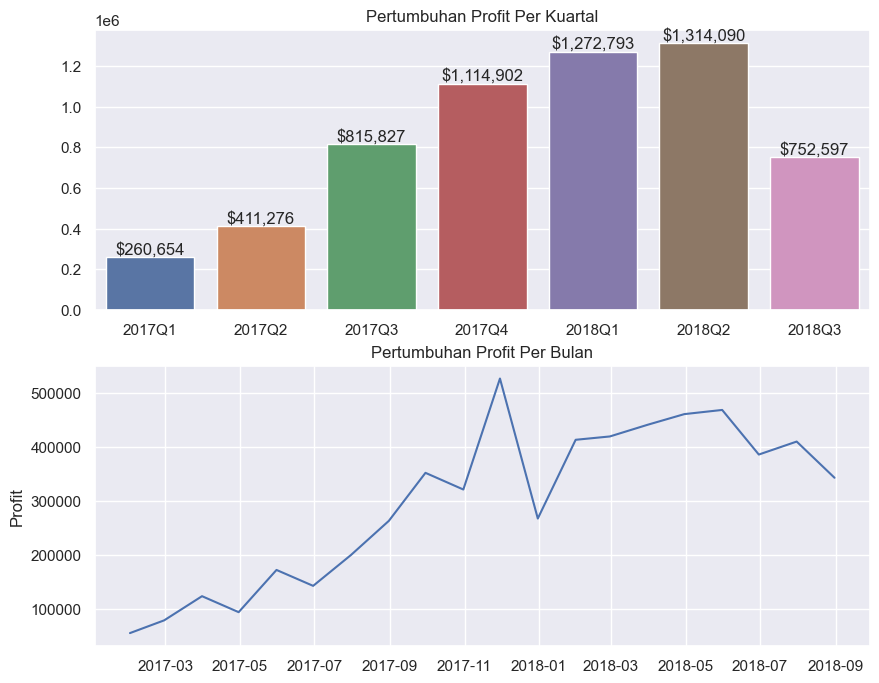

In [52]:
# Query data seusai yang di butuhkan
df_revenue = df[['profit','payment_value','price','order_time', 'quarter']]
df_revenue_quarter = df_revenue[['profit','quarter']].groupby('quarter').sum().reset_index()
df_revenue_month = df_revenue[['profit','order_time']].groupby(pd.Grouper(key='order_time', freq='1M')).sum().reset_index()

# Buat figure untuk menampung hasil plot
fig, ax = plt.subplots(nrows=2, figsize=[10, 8])
ax = ax.flatten()

# plot data menggunakan bar chart
sns.barplot(data=df_revenue_quarter, x='quarter', y='profit', ax=ax[0])
ax[0].set(xlabel='', ylabel='', title= 'Pertumbuhan Profit Per Kuartal')
# plot data menggunakan line chart
sns.lineplot(data=df_revenue_month, x='order_time', y='profit', ax=ax[1])
ax[1].set(xlabel='', ylabel='Profit', title= 'Pertumbuhan Profit Per Bulan')

# Tampilkan nilai dari masing - masing batang bar chart
for e in ax[0].containers:
    ax[0].bar_label(e, labels=[f'${x:,.0f}' for x in e.datavalues])

Insight :
- Secara kuartal total profit terus meningkat setiap kuartal hingga pada kaurtal ke tiga mengalami penurunan.
- Namun pada total profit perbulan mengalami peningkatan hingga di akhir tahun 2017 mengalami penurunan
- Kemudian kembali mengalami kenaian hingga bulan mei 2018 sebelum kembali turun hingga september 2018

### Profit dan total transaksi berdasarkan tipe pembayaran

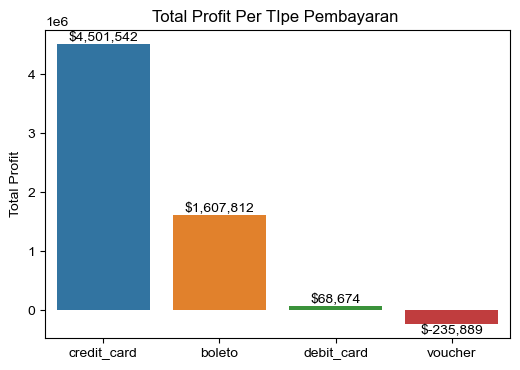

In [31]:
# Query data seusai yang di butuhkan
df_cc = df[['payment_type','profit']].groupby('payment_type').sum().reset_index().sort_values('profit', ascending=False)

# plot data menggunakan bar chart
fig, ax = plt.subplots(figsize=[6, 4])
sns.barplot(data=df_cc, x='payment_type', y='profit')
ax.set(xlabel='', ylabel='Total Profit', title= 'Total Profit Per TIpe Pembayaran ')
for e in ax.containers:
    ax.bar_label(e, labels=[f'${x:,.0f}' for x in e.datavalues])
sns.set()

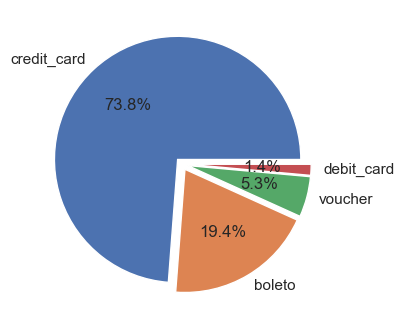

In [32]:
# Query data seusai yang di butuhkan
df_cc_trx = df[['payment_type','profit']].groupby('payment_type').count().reset_index().sort_values('profit', ascending=False)

# plot data menggunakan bar chart
fig, ax = plt.subplots(figsize=[6, 4])
palette_color = sns.color_palette('bright')
plt.pie(x=df_cc_trx['profit'], labels=df_cc_trx['payment_type'], autopct="%.1f%%", explode=[0.05]*4)
sns.set()

Insight:
- Kartu kredit merupakan tipe pembarayan yang paling banyak memberikan profit
- Tipe pembayaran voucher membuat penurunan hingga 235 ribu usd
- Total transaksi juga masih di dominasi oleh kartu kredit sebesar 73,8%
- Sedangkan total transaksi terkecil terjadi pada kartu debit

### Top 10 Kota dengan total profit dan total transaksi tertinggi

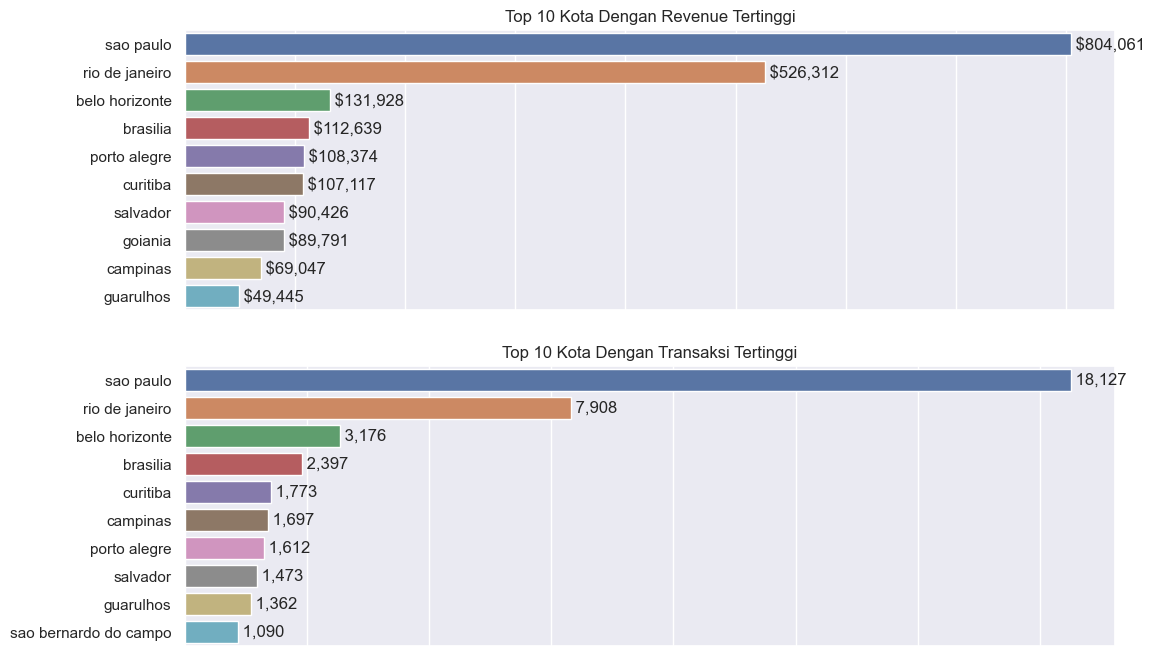

In [34]:
# Query data seusai yang di butuhkan
df_city = df[['customer_city', 'profit']].groupby('customer_city').sum().reset_index().sort_values('profit',ascending=False).head(10)
df_city_tx = df[['customer_city', 'order_id']].groupby('customer_city').count().reset_index().sort_values('order_id',ascending=False).head(10)

# Buat figure untuk menampung hasil plot
fig, ax = plt.subplots(nrows=2, figsize=[12, 8])

# plot data menggunakan bar chart
ax[0] = sns.barplot(data=df_city, x='profit', y='customer_city', ax=ax[0])
ax[0].set(xlabel='', ylabel='', title= 'Top 10 Kota Dengan Revenue Tertinggi',xticklabels='')
ax[1] = sns.barplot(data=df_city_tx, x='order_id', y='customer_city', ax=ax[1])
ax[1].set(xlabel='', ylabel='', title= 'Top 10 Kota Dengan Transaksi Tertinggi',xticklabels='')

for e in ax[0].containers:
    ax[0].bar_label(e, labels=[f' ${x:,.0f}' for x in e.datavalues])

for e in ax[1].containers:
    ax[1].bar_label(e, labels=[f' {x:,.0f}' for x in e.datavalues])


Insight :
- Sao paulo ada kota dengan transaksi dan priofit paling banyak
- Urutan 1 sd 4 di isi oleh kota yang sama antara total profit dan total transaksi
- Soa bernardo do campo masuk dalam kota dengan total transaksi terbanyak namun tidak dengan total ptofit. Bisa di ambil kesimpulan bahwa customer di kota ini melakukan pembelian hanya pada produk dengan harga murah


### Total revenue dan total transaksi perhari setiap bulan

In [55]:
# Query data seusai yang di butuhkan
df_revenue_day = df[['profit','order_day',
                        'order_month']].groupby(['order_month',
                        'order_day']).sum().reset_index()
df_trx_day = df[['profit','order_day',
                        'order_month']].groupby(['order_month',
                        'order_day']).count().reset_index()
                        
# Urutkan bulan dan hari sesuai urutan kabisat
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['order_month'] = pd.Categorical(df['order_month'], categories=months, ordered=True)

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df['order_day'] = pd.Categorical(df['order_day'], categories=days, ordered=True)

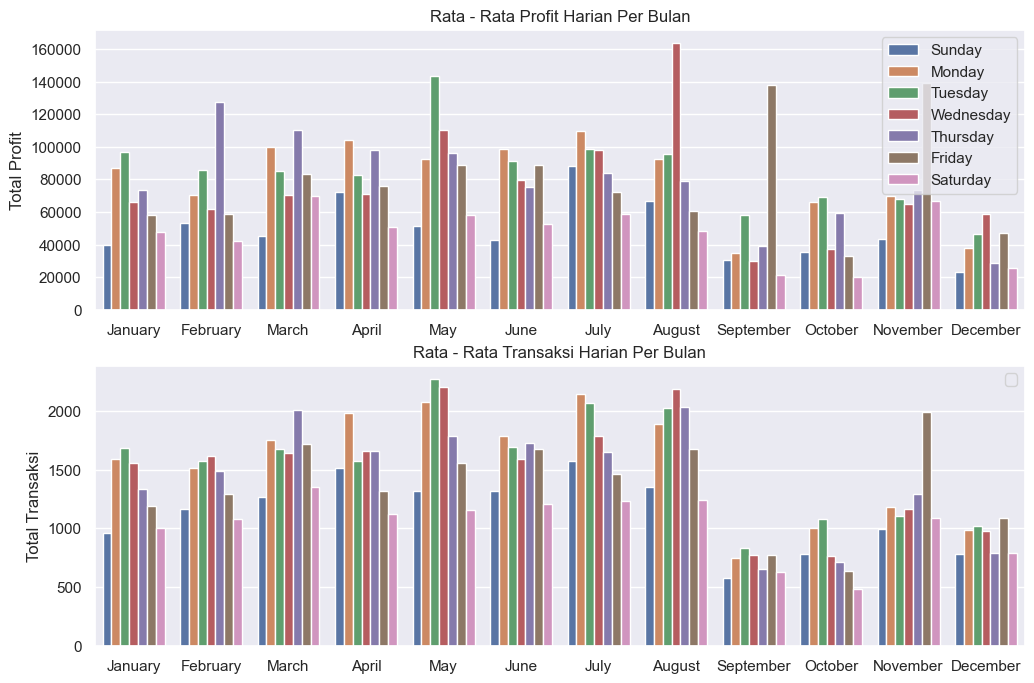

In [56]:
# Buat figure untuk menampung hasil plot
fig, ax = plt.subplots(nrows=2, figsize=[12, 8])

# plot data menggunakan bar chart
ax[0] = sns.barplot(data=df_revenue_day, hue='order_day', y='profit', x='order_month',ax=ax[0])
ax[0].set(xlabel='', ylabel='Total Profit', title= 'Rata - Rata Profit Harian Per Bulan')
ax[0].legend()
ax[1] = sns.barplot(data=df_trx_day, hue='order_day', y='profit', x='order_month',ax=ax[1])
ax[1].set(xlabel='', ylabel='Total Transaksi', title= 'Rata - Rata Transaksi Harian Per Bulan')
ax[1].legend('')
sns.set()

### Insight :
- Setiap bulan, hari senin merupakan hari yang paling sedikit baik total profit dan total transaksi
- Puncak total transaksi dan total profit terjadi pada pertengah minggu 

### Waktu pengiriman rata - rata , paling cepat dan paling lambat

In [37]:
# looping info dari fungsi describe
for i,j in enumerate(df['delivery_time'].describe()):
    if i == 1:
        print(f"Waktu pengiriman rata - rata adalah : {j:.2f} Hari")
    elif i == 3:
        print(f"Waktu pengiriman paling cepat adalah : {j:.2f} Hari")
    elif i == 7:
        print(f"Waktu pengiriman paling lama adalah : {j:.2f} Hari")

Waktu pengiriman rata - rata adalah : 12.46 Hari
Waktu pengiriman paling cepat adalah : 0.53 Hari
Waktu pengiriman paling lama adalah : 209.63 Hari


### Rata rata waktu pengiriman pada kota top 10 total revenue

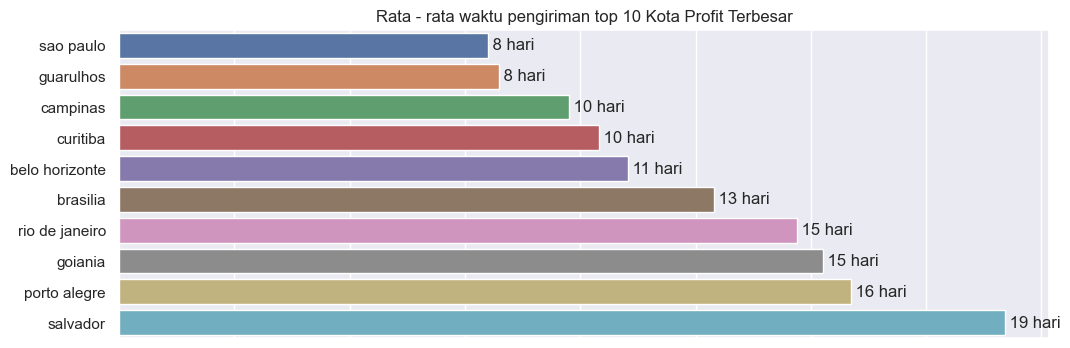

In [58]:
# Query data seusai yang di butuhkan
top10_city = df_city['customer_city'].values
df_deliv_10 = df[(df['customer_city'].isin(top10_city))]
df_deliv_10 = df_deliv_10[['customer_city','delivery_time']].groupby('customer_city').mean().reset_index().sort_values('delivery_time')

# buat figure untuk menampung hasil plot
fig, ax = plt.subplots(figsize=[12, 4])
sns.barplot(data=df_deliv_10, x='delivery_time', y='customer_city')
ax.set(xlabel='', ylabel='', title= 'Rata - rata waktu pengiriman top 10 Kota Profit Terbesar', xticklabels='')
for e in ax.containers:
    ax.bar_label(e, labels=[f' {x:,.0f} hari' for x in e.datavalues])
sns.set()

Insight: 
- Waktu perngiriman rata - rata adalah 8 - 19 hari
- Sao paolo adalah kota yang paling banyak profit dan total transaksi namun waktu pengiriman juga cepat yaitu 8 hari

### Hubungan Harga, Kota, Type Pembayaran, Kategori Pembayaran Dengan Waktu Pengiriman

In [39]:
# Query data seusai yang di butuhkan
df_corr = df[['customer_city','payment_value','payment_type','product_category','delivery_time']]

# cari korelasi dengan fungsi korelasi
df_corr[['payment_value','delivery_time']].corr()

,payment_value,delivery_time
payment_value,1.000000,0.060654
delivery_time,0.060654,1.000000


Antara harga produk dan waktu pengiriman tidak memiliki keterkaitan satu sama lain

In [40]:
# buat sebuah list untuk menampung data
encode = []

# for loop untuk proses encoding
for i in df['delivery_time']:
    if i < 30:
        encode.append('1M')
    elif i < 60:
        encode.append('2M')
    elif i < 90:
        encode.append('3M')
    elif i < 120:
        encode.append('4M')
    elif i < 150:
        encode.append('5M')
    elif i < 180:
        encode.append('6M')
    else:
        encode.append('>6M')

# buat kolom baru dengan hasil encoding
df_corr['delivery_encode'] = encode

C:\Users\Dicky Librata\AppData\Local\Temp\ipykernel_13628\1443880732.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['delivery_encode'] = encode


In [42]:
# Hipotesis  Testing dengan chi Square
H0 = 'Type Pembayaran tidak memiliki hubungan dengan waktu pengiriman'
H1 = 'Type Pembayaran memiliki hubungan dengan waktu pengiriman'

contingency_table=pd.crosstab(df_corr["payment_type"],df_corr["delivery_encode"])
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"p-value = {p}")
if p > 0.05:
    print(f'Result : Fail to Reject H0\n{H0}')
else:
    print(f'Result : Reject H0\n{H1}')

p-value = 0.00014466403674253254
Result : Reject H0
Type Pembayaran memiliki hubungan dengan waktu pengiriman


In [43]:
# Hipotesis  Testing dengan chi Square
H0 = 'Kota customer tidak memiliki hubungan dengan waktu pengiriman'
H1 = 'Kota customer memiliki hubungan dengan waktu pengiriman'

contingency_table=pd.crosstab(df_corr["customer_city"],df_corr["delivery_encode"])
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"p-value = {p}")
if p > 0.05:
    print(f'Result : Fail to Reject H0\n{H0}')
else:
    print(f'Result : Reject H0\n{H1}')

p-value = 0.0
Result : Reject H0
Kota customer memiliki hubungan dengan waktu pengiriman


In [44]:
# Hipotesis  Testing dengan chi Square
H0 = 'Kategori Produk tidak memiliki hubungan dengan waktu pengiriman'
H1 = 'Kategori Produk memiliki hubungan dengan waktu pengiriman'

contingency_table=pd.crosstab(df_corr["product_category"],df_corr["delivery_encode"])
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"p-value = {p}")
if p > 0.05:
    print(f'Result : Fail to Reject H0\n{H0}')
else:
    print(f'Result : Reject H0\n{H1}')

p-value = 2.910534799476503e-37
Result : Reject H0
Kategori Produk memiliki hubungan dengan waktu pengiriman


Insight :
- Waktu pengiriman tidak dipengaruhi oleh harga produk
- Kategori Produk memiliki hubungan dengan waktu pengiriman
- Kota customer memiliki hubungan dengan waktu pengiriman
- Type Pembayaran memiliki hubungan dengan waktu pengiriman

## Kesimpulan

Dari seluruh pengolahan data yang dilakukan dapat di ambil kesimpulan:
- Trend revenue mengalami peningkatan per kuartal meski perbulan ada beberapa kali mengalami penurunan
- Kartu kredit merupakan tipe pembayaran yang paling meningkatkan revenue dan total transaksi terbanyak
- Profit dan total transaksi secara demografi kota cukup linear. Meski ada satu kota yang memiliki transaksi cukup bnyak namun tidak memiliki total revenue yang linear
- Revenu harian cenderung rendah di awal minggu dan meningkat hingga pertengahan minggu kemudian mulai turun kembali hinga akhir minggu
- Waktu pengiriman paling cepat adalah 0.53 Hari dan Waktu pengiriman paling lama adalah 209.63 Hari
- Dari beberapa aspek, kategori produk, type pembayaran, dan kota customer yang berpengaruh terhadap waktu pengiriman